In [1]:
%matplotlib inline
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
import math

In [2]:
#read in data
from astropy.table import Table
t = Table.read('../TgasWright2Mass_sdssdr12_topcat2.vot', format='votable')

In [3]:
print("The astropy reader loads the data into the following variable names:")
print(t.colnames)
print("\nThe number of stars is " + str(len(t)))

The astropy reader loads the data into the following variable names:
['d_arcsec', 'col1', 'angDist', 'd_arcsec_2', 'X_RAJ2000', 'X_DEJ2000', 'HIP', 'TYC2', 'Source', 'RA_ICRS', 'e_RA_ICRS', 'DE_ICRS', 'e_DE_ICRS', 'Plx', 'e_Plx', 'pmRA', 'e_pmRA', 'pmDE', 'e_pmDE', 'Dup', 'X.FG.', 'e_.FG.', 'X.Gmag.', 'Var', 'X_RAJ2000.1', 'X_DEJ2000.1', 'TYC1', 'TYC2.1', 'TYC3', 'RAJ2000', 'DEJ2000', 'VTmag', 'BTmag', 'r_SpType', 'Dist', 'Teff', 'SpType', 'X2MASS', 'RAJ2000.1', 'DEJ2000.1', 'errHalfMaj', 'errHalfMin', 'errPosAng', 'Jmag', 'Hmag', 'Kmag', 'e_Jmag', 'e_Hmag', 'e_Kmag', 'Qfl', 'Rfl', 'X', 'MeasureJD', 'RAdeg', 'DEdeg', 'errHalfMaj_2', 'errHalfMin_2', 'errPosAng_2', 'objID', 'mode', 'q_mode', 'class', 'SDSS12', 'm_SDSS12', 'flags', 'ObsDate', 'Q', 'umag', 'e_umag', 'gmag', 'e_gmag', 'rmag', 'e_rmag', 'imag', 'e_imag', 'zmag', 'e_zmag', 'zsp', 'e_zsp', 'f_zsp', 'zph', 'e_zph', 'avg_zph', 'pmRA_2', 'e_pmRA_2', 'pmDE_2', 'e_pmDE_2', 'SpObjID', 'spType', 'spCl', 'subClass']

The number of sta

In [4]:
#Rename columns
Source = t["Source"]
Gmag = t["X.Gmag."]
Vmag = t["VTmag"]
Bmag = t["BTmag"]
Jmag = t["Jmag"]
Hmag = t["Hmag"]
Kmag = t["Kmag"]
QFlags = t["Qfl"]
DistW = t["Dist"]
s1= t["d_arcsec"]
s2 = t["d_arcsec_2"]
plx = t['Plx']
Teff = t['Teff']
e_Jmag = t['e_Jmag']
e_Kmag = t['e_Kmag']
e_Hmag = t['e_Hmag']
SpType = t["SpType"]
dup = t['Dup']
RA = t["X_RAJ2000"]
DEC = t["X_DEJ2000"]
col1 = t["col1"]

In [5]:
Dist = 1000./t["Plx"]
Abs_Vmags = Vmag - 5 * np.log10(Dist) + 5
Abs_Bmags = Bmag - 5 * np.log10(Dist) + 5
Abs_Gmags = Gmag - 5 * np.log10(Dist) + 5
Abs_Jmags = Jmag -5 * np.log10(Dist) + 5
Abs_Hmags = Hmag - 5 * np.log10(Dist) + 5
Abs_Kmags = Kmag - 5 * np.log10(Dist) + 5

In [7]:
#mask all values with dup = 1
imask = 0
for i in range(0,len(dup)):
    if (dup[i] > 0.5):
        imask = imask + 1
        row = t[i]
        idx = row._index
        cols = row._table.columns.values()
        for col in cols:
            col.mask[i] = True
for i in range(0,len(dup)):
    if(dup[i] > 0.5):
        print(i,dup[i])
print(" Masked ",imask," rows in which dup is equal to 1")

 Masked  0  rows in which dup is equal to 1


In [8]:
#get rid of duplicates
for i in range(len(col1)):
    first_match = col1[i]
    for j in range(i+1,len(col1)):
        if (first_match == col1[j]):
            col1.mask[j] = True
        else: break
stars = 0
for i in range(len(col1)): 
    if (col1.mask[i] == False):
        stars = stars+1
print("The number of stars after filtering for duplicates is: " + str(stars))

The number of stars after filtering for duplicates is: 14414


AttributeError: 'MaskedConstant' object has no attribute '_hardmask'

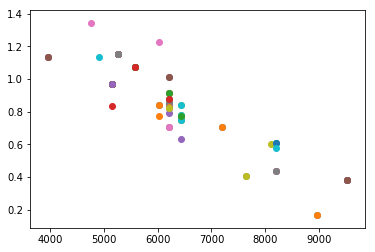

In [12]:
#Plot H-R diagram 
G_J = ma.array([])
G_J = Abs_Gmags-Abs_Jmags 
for i in range(len(G_J)):
    plt.scatter(Teff[i],G_J[i])